In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


Summary Statistics by Fitness Level:
                     Age                Weight                 Height  \
                    mean        std       mean        std        mean   
Fitness_Level                                                           
High           26.444389   9.409452  71.347293  10.072235  175.883845   
Low            30.840093  10.178896  74.589247  12.782527  174.192333   

                        VO2_per_kg                    HR             
                    std       mean       std        mean        std  
Fitness_Level                                                        
High           7.114974  35.995568  2.917503  148.321635  32.540430  
Low            8.345472  27.860598  3.186995  145.534498  31.800994  


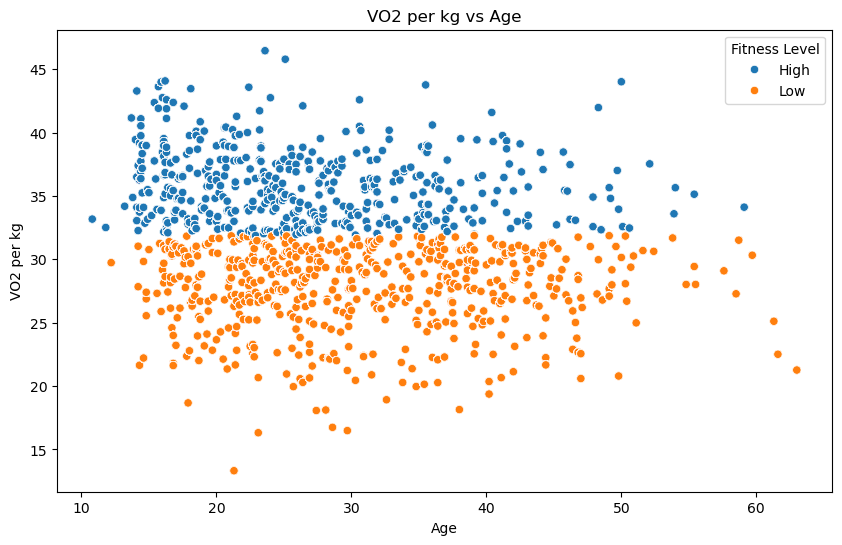

In [3]:
# Load the datasets
subject_info_df = pd.read_csv('subject-info.csv')
test_measure_df = pd.read_csv('test_measure.csv')

# Merge the datasets on 'ID_test'
merged_df = pd.merge(subject_info_df, test_measure_df, on='ID_test', how='inner')

# Calculate the mean VO2 per ID_test
vo2_calc = merged_df.groupby('ID_test').agg({'VO2': 'mean'}).reset_index()

# Merge the VO2 calculations back with the merged_df
vo2_athlete = pd.merge(merged_df, vo2_calc, on='ID_test', how='inner', suffixes=('', '_mean'))

# Calculate VO2_per_kg
vo2_athlete['VO2_per_kg'] = vo2_athlete['VO2_mean'] / vo2_athlete['Weight']

# Step 1: Create Fitness Level based on VO2_per_kg
vo2_athlete['Fitness_Level'] = np.where(vo2_athlete['VO2_per_kg'] < vo2_athlete['VO2_per_kg'].median(), 'Low', 'High')

# Step 2: Summary Statistics by Fitness Level
summary_stats = vo2_athlete.groupby('Fitness_Level').agg(
    {
        'Age': ['mean', 'std'],
        'Weight': ['mean', 'std'],
        'Height': ['mean', 'std'],
        'VO2_per_kg': ['mean', 'std'],
        'HR': ['mean', 'std'],
    }
)

print("\nSummary Statistics by Fitness Level:")
print(summary_stats)

# Step 3: Visualizations
# VO2 per kg vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='VO2_per_kg', hue='Fitness_Level', data=vo2_athlete)
plt.title('VO2 per kg vs Age')
plt.xlabel('Age')
plt.ylabel('VO2 per kg')
plt.legend(title='Fitness Level')
plt.show()


In [23]:
import pandas as pd
import pygal

# Load the dataset
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Join the dataframes on ID and ID_test
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'])

# Function to calculate Fitness Index
def calculate_fitness_index(row):
    speed = row['Speed']
    weight = row['Weight']
    age = row['Age']
    fitness_index = (speed * 100) / weight * (50 / age)
    return fitness_index

# Apply the function to calculate Fitness Index
joined_df['Fitness Index'] = joined_df.apply(calculate_fitness_index, axis=1)

# Define range categories for Fitness Index
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
joined_df['Fitness Index Category'] = pd.cut(joined_df['Fitness Index'], bins=bins, labels=labels, right=False)

# Count the number of athletes in each Fitness Index category
category_counts = joined_df['Fitness Index Category'].value_counts().sort_index()

# Create a funnel chart object
funnel_chart = pygal.Funnel()
funnel_chart.title = 'Fitness Index Funnel Chart'

# Add data to the chart
for category, count in category_counts.items():
    funnel_chart.add(category, count)

# Render the chart to a file
funnel_chart.render_to_file('fitness_index_funnel_chart.svg')


In [27]:
import pandas as pd
import pygal

# Load the dataset
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Join the dataframes on ID and ID_test
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'])

# Function to calculate Fitness Index
def calculate_fitness_index(row):
    speed = row['Speed']
    weight = row['Weight']
    age = row['Age']
    fitness_index = (speed * 100) / weight * (50 / age)
    return fitness_index

# Apply the function to calculate Fitness Index
joined_df['Fitness Index'] = joined_df.apply(calculate_fitness_index, axis=1)

# Define range categories for Fitness Index
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
joined_df['Fitness Index Category'] = pd.cut(joined_df['Fitness Index'], bins=bins, labels=labels, right=False)

# Count the number of athletes in each Fitness Index category
category_counts = joined_df['Fitness Index Category'].value_counts().sort_index()

# Create a bar chart object
bar_chart = pygal.Bar()
bar_chart.title = 'Fitness Index Categories Bar Chart'

# Add data to the chart
for category, count in category_counts.items():
    bar_chart.add(str(category), count)

# Render the chart to a file
bar_chart.render_to_file('fitness_index_bar_chart.svg')


In [29]:
print(category_counts)

Fitness Index Category
Very Low     250393
Low          210012
Moderate      78201
High          24373
Very High      8708
Name: count, dtype: int64


In [33]:
import pandas as pd
import pygal

# Load the dataset
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Join the dataframes on ID and ID_test
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'])

# Function to calculate Fitness Index for each unique ID
def calculate_fitness_index(row):
    speed = row['Speed']
    weight = row['Weight']
    age = row['Age']
    fitness_index = (speed * 100) / weight * (50 / age)
    return fitness_index

# Apply the function to calculate Fitness Index
joined_df['Fitness Index'] = joined_df.apply(calculate_fitness_index, axis=1)

# Calculate the mean Fitness Index per unique ID
fitness_index_mean = joined_df.groupby('ID')['Fitness Index'].mean().reset_index()

# Define range categories for Fitness Index
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
fitness_index_mean['Fitness Index Category'] = pd.cut(fitness_index_mean['Fitness Index'], bins=bins, labels=labels, right=False)

# Count the number of unique IDs in each Fitness Index category
category_counts = fitness_index_mean['Fitness Index Category'].value_counts().sort_index()

# Create a bar chart object
bar_chart = pygal.Bar()
bar_chart.title = 'Fitness Index Categories Bar Chart for Unique IDs'

# Add data to the chart
for category, count in category_counts.items():
    bar_chart.add(str(category), count)

# Render the chart to a file
bar_chart.render_to_file('fitness_index_bar_chart.svg')


In [35]:
import pandas as pd
import pygal

# Load the dataset
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Join the dataframes on ID and ID_test
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'])

# Function to calculate Fitness Index for each unique ID
def calculate_fitness_index(row):
    speed = row['Speed']
    weight = row['Weight']
    age = row['Age']
    fitness_index = (speed * 100) / weight * (50 / age)
    return fitness_index

# Apply the function to calculate Fitness Index
joined_df['Fitness Index'] = joined_df.apply(calculate_fitness_index, axis=1)

# Calculate the mean Fitness Index per unique ID
fitness_index_mean = joined_df.groupby('ID')['Fitness Index'].mean().reset_index()

# Define range categories for Fitness Index
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
fitness_index_mean['Fitness Index Category'] = pd.cut(fitness_index_mean['Fitness Index'], bins=bins, labels=labels, right=False)

# Count the number of unique IDs in each Fitness Index category
category_counts = fitness_index_mean['Fitness Index Category'].value_counts().sort_index()

# Create a funnel chart object
funnel_chart = pygal.Funnel()
funnel_chart.title = 'Fitness Index Categories Funnel Chart for Unique IDs'

# Add data to the chart
for category, count in category_counts.items():
    funnel_chart.add(str(category), count)

# Render the chart to a file
funnel_chart.render_to_file('fitness_index_funnel_chart.svg')


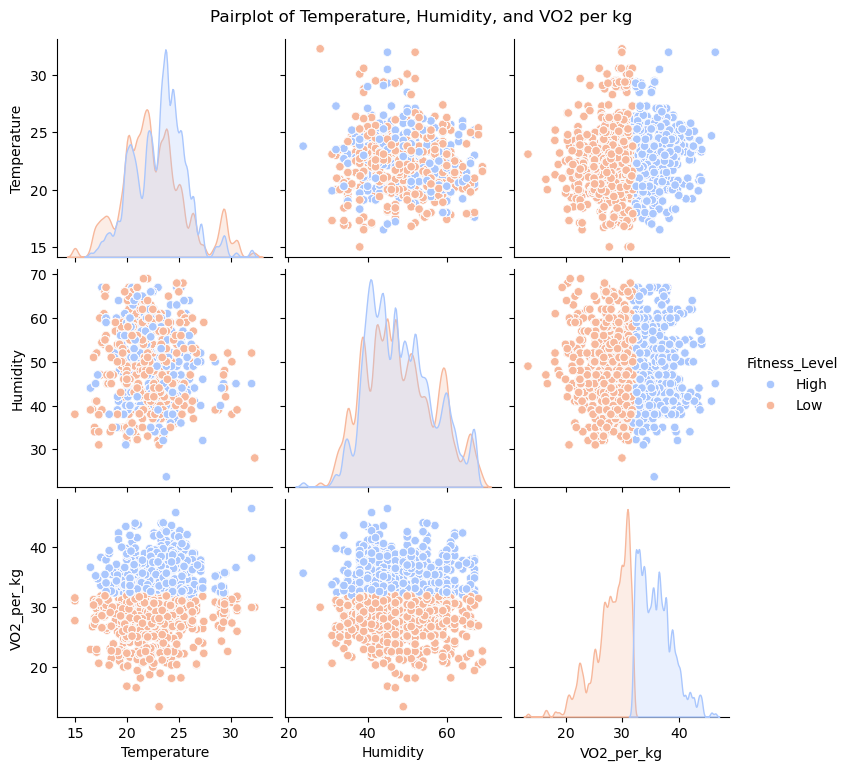

In [37]:
# Merge the datasets on 'ID_test'
merged_df = pd.merge(subject_info_df, test_measure_df, on='ID_test', how='inner')

# Calculate the mean VO2 per ID_test
vo2_calc = merged_df.groupby('ID_test').agg({'VO2': 'mean'}).reset_index()

# Merge the VO2 calculations back with the merged_df
vo2_athlete = pd.merge(merged_df, vo2_calc, on='ID_test', how='inner', suffixes=('', '_mean'))

# Calculate VO2_per_kg
vo2_athlete['VO2_per_kg'] = vo2_athlete['VO2_mean'] / vo2_athlete['Weight']

# Step 1: Create Fitness Level based on VO2_per_kg
vo2_athlete['Fitness_Level'] = np.where(vo2_athlete['VO2_per_kg'] < vo2_athlete['VO2_per_kg'].median(), 'Low', 'High')

sns.pairplot(vo2_athlete, vars=['Temperature', 'Humidity', 'VO2_per_kg'], hue='Fitness_Level', palette='coolwarm')
plt.suptitle('Pairplot of Temperature, Humidity, and VO2 per kg', y=1.02)
plt.show()

In [39]:
import pandas as pd
from datetime import datetime

df = pd.read_csv('subject-info.csv')
# Create a new column for Birth Year
current_year = datetime.now().year
df['Birth Year'] = current_year - df['Age']

# Display DataFrame with Birth Year column
print("DataFrame with Birth Year column:")
print(df)

# Iteratively delete the Birth Year column
while 'Birth Year' in df.columns:
    df = df.drop(columns=['Birth Year'])

# Display DataFrame after deleting Birth Year column
print("\nDataFrame after deleting Birth Year column:")
print(df)

DataFrame with Birth Year column:
      Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test  Birth Year
0    10.8    48.8   163.0      39.0         20.7    1  543   543_1      2014.2
1    11.8    41.0   150.0      41.0         22.3    1   11    11_1      2013.2
2    12.2    46.0   160.0      37.0         21.5    0  829   829_1      2012.8
3    13.2    71.0   190.0      49.0         23.8    1  284   284_1      2011.8
4    13.7    53.8   169.7      40.0         25.3    0  341   341_1      2011.3
..    ...     ...     ...       ...          ...  ...  ...     ...         ...
987  59.1    64.7   172.0      38.0         24.4    0  856   856_2      1965.9
988  59.7    65.2   172.0      51.0         16.8    0  856   856_3      1965.3
989  61.3   102.0   185.0      56.0         20.5    0  390   390_1      1963.7
990  61.6    74.0   169.0      46.0         23.9    0  596   596_1      1963.4
991  63.0    83.5   171.5      48.0         22.2    0  296   296_1      1962.0

[992 rows x 9 col

In [41]:
import pandas as pd
from datetime import datetime

# Read data from CSV
df = pd.read_csv('subject-info.csv')

# Create a new column for Birth Year
current_year = datetime.now().year
df['Birth Year'] = current_year - df['Age']

# Convert Birth Year to integers
df['Birth Year'] = df['Birth Year'].astype(int)

# Display DataFrame with Birth Year column
print("DataFrame with Birth Year column:")
print(df[['Birth Year']])

# Iteratively delete the Birth Year column
while 'Birth Year' in df.columns:
    df = df.drop(columns=['Birth Year'])

# Display DataFrame after deleting Birth Year column
print("\nDataFrame after deleting Birth Year column:")
print(df)


DataFrame with Birth Year column:
     Birth Year
0          2014
1          2013
2          2012
3          2011
4          2011
..          ...
987        1965
988        1965
989        1963
990        1963
991        1962

[992 rows x 1 columns]

DataFrame after deleting Birth Year column:
      Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test
0    10.8    48.8   163.0      39.0         20.7    1  543   543_1
1    11.8    41.0   150.0      41.0         22.3    1   11    11_1
2    12.2    46.0   160.0      37.0         21.5    0  829   829_1
3    13.2    71.0   190.0      49.0         23.8    1  284   284_1
4    13.7    53.8   169.7      40.0         25.3    0  341   341_1
..    ...     ...     ...       ...          ...  ...  ...     ...
987  59.1    64.7   172.0      38.0         24.4    0  856   856_2
988  59.7    65.2   172.0      51.0         16.8    0  856   856_3
989  61.3   102.0   185.0      56.0         20.5    0  390   390_1
990  61.6    74.0   169.0      46.0

In [ ]:
display the number of  excercise test taken by each Id ? find which ID  is minimum and maximum ?

In [43]:
# Calculate the number of exercise tests taken by each ID
exercise_counts = df.groupby('ID')['ID_test'].count().reset_index()
exercise_counts.columns = ['ID', 'Exercise Count']

# Find the ID with the minimum and maximum exercise tests
min_exercise_id = exercise_counts.loc[exercise_counts['Exercise Count'].idxmin()]
max_exercise_id = exercise_counts.loc[exercise_counts['Exercise Count'].idxmax()]

# Display the results
print("Number of Exercise Tests taken by each ID:")
print(exercise_counts)

print("\nID with Minimum Exercise Tests:")
print(min_exercise_id)

print("\nID with Maximum Exercise Tests:")
print(max_exercise_id)


Number of Exercise Tests taken by each ID:
      ID  Exercise Count
0      1               1
1      2               1
2      3               1
3      4               1
4      5               1
..   ...             ...
852  853               1
853  854               1
854  855               2
855  856               3
856  857               1

[857 rows x 2 columns]

ID with Minimum Exercise Tests:
ID                1
Exercise Count    1
Name: 0, dtype: int64

ID with Maximum Exercise Tests:
ID                506
Exercise Count      5
Name: 505, dtype: int64


In [55]:
df = pd.read_csv('subject-info.csv')


In [57]:
df

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1
...,...,...,...,...,...,...,...,...
987,59.1,64.7,172.0,38.0,24.4,0,856,856_2
988,59.7,65.2,172.0,51.0,16.8,0,856,856_3
989,61.3,102.0,185.0,56.0,20.5,0,390,390_1
990,61.6,74.0,169.0,46.0,23.9,0,596,596_1


In [59]:
# Melt the DataFrame
melted_df = pd.melt(df, id_vars=['ID', 'ID_test'], var_name='Attribute', value_name='Value')

# Display the melted DataFrame
print("Melted DataFrame:")
print(melted_df)

Melted DataFrame:
       ID ID_test Attribute  Value
0     543   543_1       Age   10.8
1      11    11_1       Age   11.8
2     829   829_1       Age   12.2
3     284   284_1       Age   13.2
4     341   341_1       Age   13.7
...   ...     ...       ...    ...
5947  856   856_2       Sex    0.0
5948  856   856_3       Sex    0.0
5949  390   390_1       Sex    0.0
5950  596   596_1       Sex    0.0
5951  296   296_1       Sex    0.0

[5952 rows x 4 columns]


In [61]:
melted_df.shape

(5952, 4)

In [ ]:
Transform  any one given DataFrame from wide format to long format and then pivot it back to wide format

In [69]:
# Melt the DataFrame
melted_df = pd.melt(df, id_vars=['ID', 'ID_test'], var_name='Attribute', value_name='Value')
print("Long format data frame:")
print(melted_df)

# Pivot the melted DataFrame to wide format
pivoted_df = melted_df.pivot(index=['ID', 'ID_test'], columns='Attribute', values='Value').reset_index()

# Display the pivoted DataFrame
print("Wide DataFrame:")
print(pivoted_df)

Long format data frame:
       ID ID_test Attribute  Value
0     543   543_1       Age   10.8
1      11    11_1       Age   11.8
2     829   829_1       Age   12.2
3     284   284_1       Age   13.2
4     341   341_1       Age   13.7
...   ...     ...       ...    ...
5947  856   856_2       Sex    0.0
5948  856   856_3       Sex    0.0
5949  390   390_1       Sex    0.0
5950  596   596_1       Sex    0.0
5951  296   296_1       Sex    0.0

[5952 rows x 4 columns]
Wide DataFrame:
Attribute   ID ID_test   Age  Height  Humidity  Sex  Temperature  Weight
0            1     1_1  32.7   173.5       NaN  0.0          NaN    67.0
1            2     2_1  33.8   171.1       NaN  0.0          NaN    68.0
2            3     3_1  16.6   176.0      43.0  0.0         24.6    63.8
3            4     4_1  28.5   181.3       NaN  0.0          NaN    88.0
4            5     5_1  23.4   181.4       NaN  0.0          NaN    85.0
..         ...     ...   ...     ...       ...  ...          ...     ...
987 

In [73]:
df['Humidity'].value_counts()

Humidity
47.0    61
44.0    49
42.0    47
43.0    47
45.0    44
52.0    43
39.0    42
41.0    39
51.0    34
49.0    34
40.0    34
38.0    33
50.0    33
59.0    31
60.0    30
46.0    28
48.0    27
55.0    26
54.0    26
53.0    25
35.0    22
58.0    20
57.0    16
61.0    16
56.0    16
66.0    14
67.0    14
62.0    14
37.0    13
34.0    12
36.0    10
64.0     9
65.0     9
63.0     8
32.0     6
33.0     6
31.0     3
68.0     3
69.0     2
38.1     2
32.2     2
55.7     2
37.9     1
54.4     1
47.9     1
49.9     1
40.1     1
65.9     1
28.0     1
39.1     1
50.5     1
23.7     1
Name: count, dtype: int64

In [75]:
df['Temperature']

0      20.7
1      22.3
2      21.5
3      23.8
4      25.3
       ... 
987    24.4
988    16.8
989    20.5
990    23.9
991    22.2
Name: Temperature, Length: 992, dtype: float64

create a swarm plot to visualize the relationship between humidity and temperature ?

Text(103.72222222222221, 0.5, 'Temperature')

C:\Users\akals\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



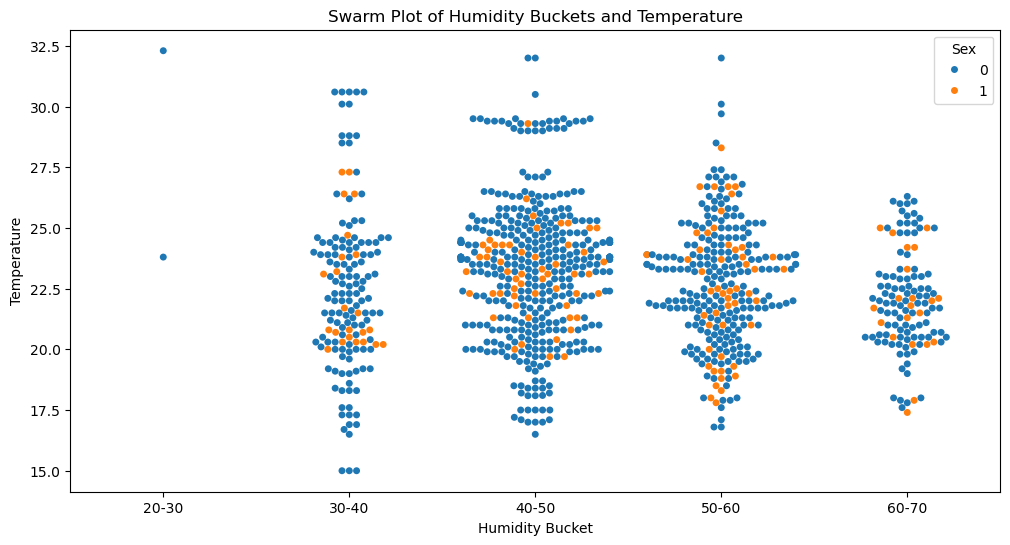

In [85]:
# Create buckets for Humidity
humidity_bins = [20, 30, 40, 50, 60, 70]
humidity_labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['Humidity_Bucket'] = pd.cut(df['Humidity'], bins=humidity_bins, labels=humidity_labels, right=False)
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='Humidity_Bucket', y='Temperature', hue= 'Sex')
plt.title('Swarm Plot of Humidity Buckets and Temperature')
plt.xlabel('Humidity Bucket')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

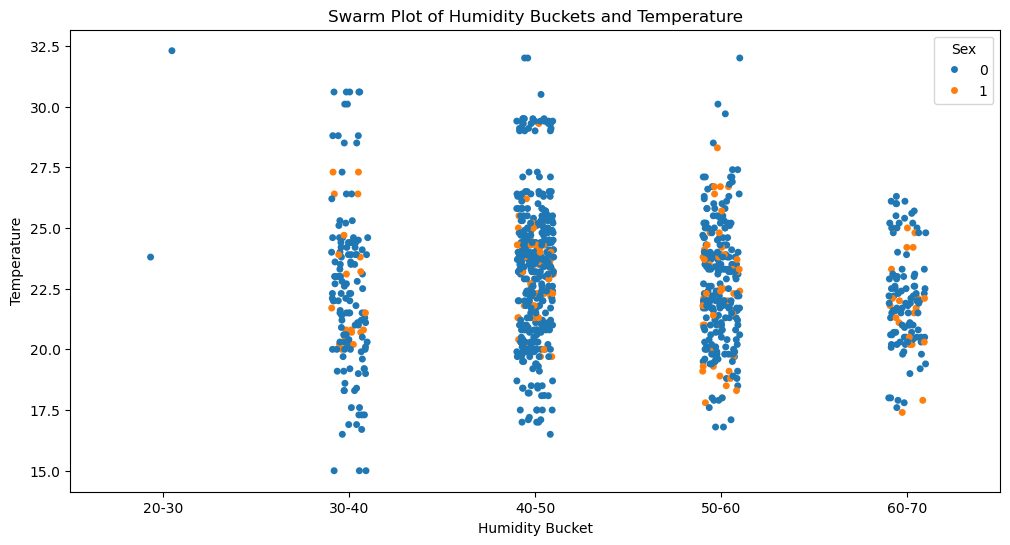

In [89]:
# Create buckets for Humidity
humidity_bins = [20, 30, 40, 50, 60, 70]
humidity_labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['Humidity_Bucket'] = pd.cut(df['Humidity'], bins=humidity_bins, labels=humidity_labels, right=False)
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='Humidity_Bucket', y='Temperature',hue ='Sex')
plt.title('Swarm Plot of Humidity Buckets and Temperature')
plt.xlabel('Humidity Bucket')
plt.ylabel('Temperature')

In [3]:
# Load the datasets
subject_info_df = pd.read_csv('subject-info.csv')
test_measure_df = pd.read_csv('test_measure.csv')

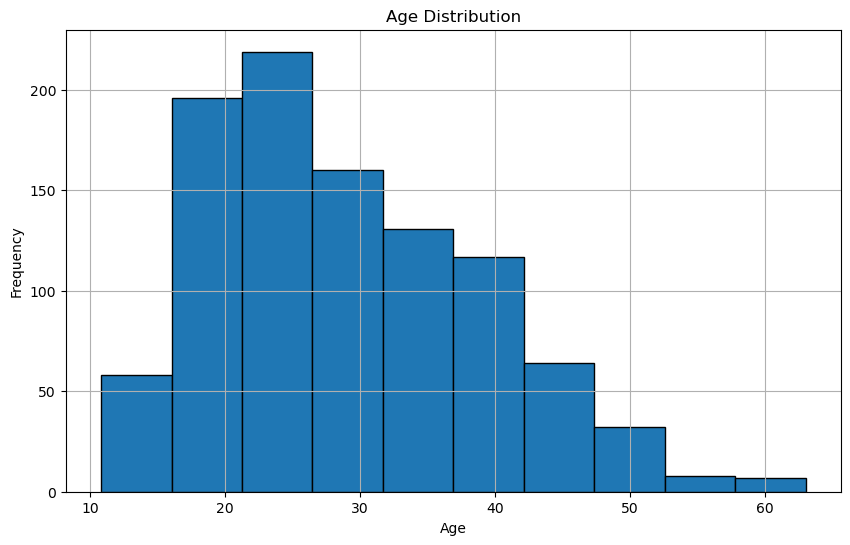

In [5]:
# Plot a histogram to show the distribution of Age
plt.figure(figsize=(10, 6))
plt.hist(subject_info_df['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
subject_info_df.columns


Index(['Age', 'Weight', 'Height', 'Humidity', 'Temperature', 'Sex', 'ID',
       'ID_test'],
      dtype='object')

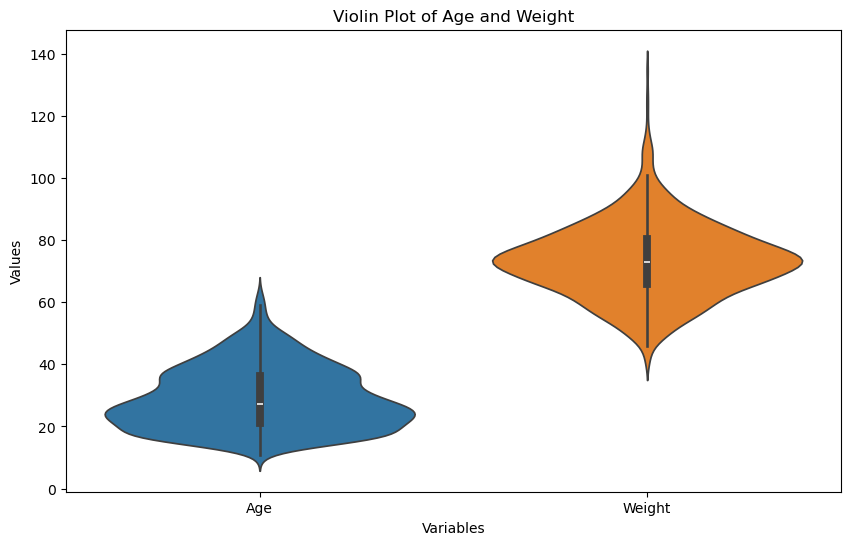

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=subject_info_df[['Age', 'Weight']])
plt.title('Violin Plot of Age and Weight')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

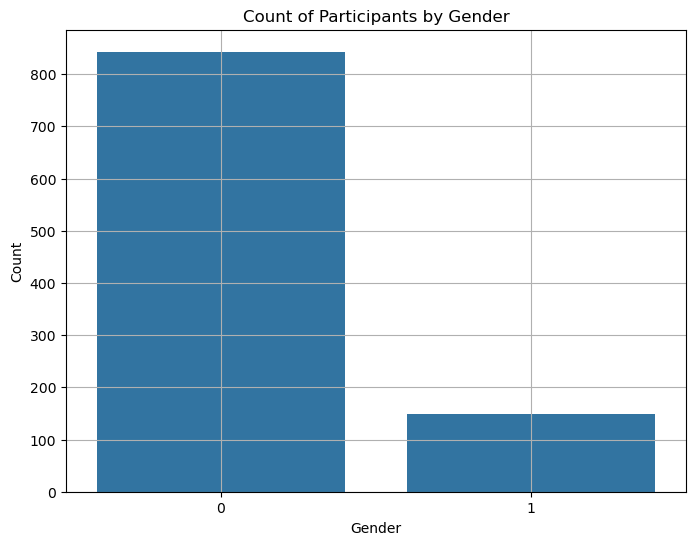

In [15]:
# Create count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=subject_info_df)
plt.title('Count of Participants by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [17]:
# Calculate BSA directly in the DataFrame
subject_info_df['BSA'] = np.sqrt((subject_info_df['Weight'] * subject_info_df['Height']) / 3600)

# Categorize BSA directly without using a function
subject_info_df['BSA_Category'] = np.where(subject_info_df['BSA'] < 1.6, 'Low',
                              np.where(subject_info_df['BSA'] < 1.9, 'Normal', 'High'))

In [21]:
subject_info_df[['ID','BSA','BSA_Category']]

,ID,BSA,BSA_Category
0,543,1.486457,Low
1,11,1.307032,Low
2,829,1.429841,Low
3,284,1.935774,High
4,341,1.592505,Low
...,...,...,...
987,856,1.758187,Normal
988,856,1.764968,Normal
989,390,2.289469,High
990,596,1.863837,Normal



Summary Statistics by Fitness Level:
                     Age               Weight                 Height  \
                    mean       std       mean        std        mean   
Fitness_Level                                                          
High           27.196712  9.905958  70.883485   9.838106  175.425139   
Low            30.075455  9.970667  75.063238  12.831878  174.658978   

                        VO2_per_kg                    HR             
                    std       mean       std        mean        std  
Fitness_Level                                                        
High           7.057734  57.119721  5.514813  146.560467  33.225283  
Low            8.463424  42.885494  5.314288  147.328542  31.129105  


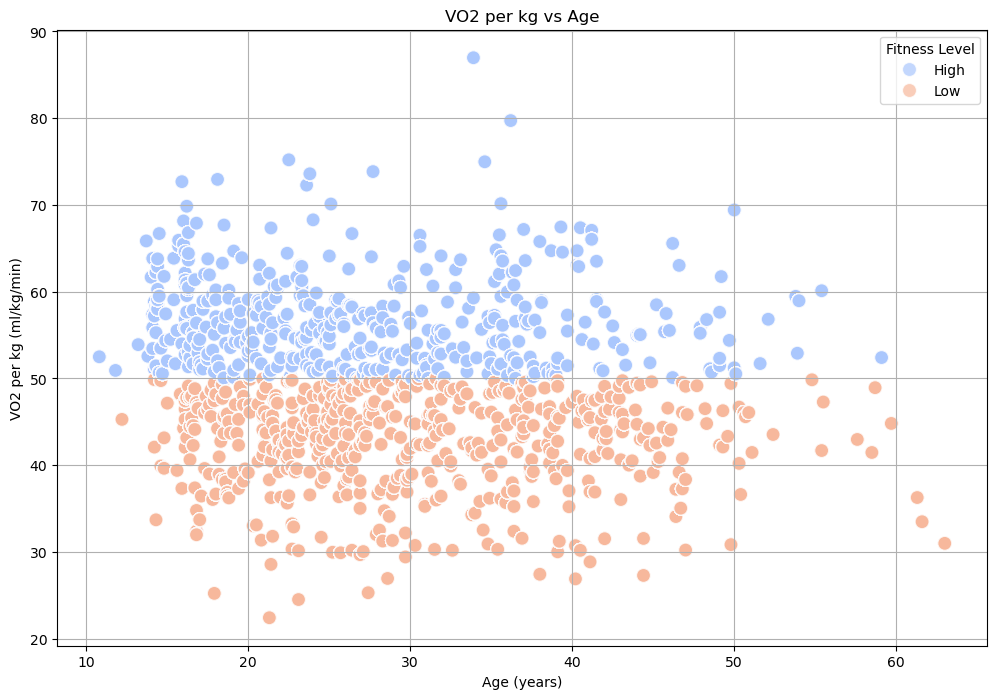

In [29]:
# Merge the datasets on 'ID_test'
merged_df = pd.merge(subject_info_df, test_measure_df, on='ID_test', how='inner')

# Calculate the maximum VO2 per ID_test
vo2_calc = merged_df.groupby('ID_test').agg({'VO2': 'max'}).reset_index()

# Merge the VO2 calculations back with the merged_df
vo2_athlete = pd.merge(merged_df, vo2_calc, on='ID_test', how='inner', suffixes=('', '_max'))

# Calculate VO2_per_kg using maximum VO2
vo2_athlete['VO2_per_kg'] = vo2_athlete['VO2_max'] / vo2_athlete['Weight']

# Step 1: Create Fitness Level based on VO2_per_kg
vo2_athlete['Fitness_Level'] = np.where(vo2_athlete['VO2_per_kg'] < vo2_athlete['VO2_per_kg'].median(), 'Low', 'High')

# Step 2: Summary Statistics by Fitness Level
summary_stats = vo2_athlete.groupby('Fitness_Level').agg(
    {
        'Age': ['mean', 'std'],
        'Weight': ['mean', 'std'],
        'Height': ['mean', 'std'],
        'VO2_per_kg': ['mean', 'std'],
        'HR': ['mean', 'std'],
    }
)

print("\nSummary Statistics by Fitness Level:")
print(summary_stats)

# Step 3: Visualizations
# VO2 per kg vs Age
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='VO2_per_kg', hue='Fitness_Level', data=vo2_athlete, palette='coolwarm', s=100, alpha=0.7)
plt.title('VO2 per kg vs Age')
plt.xlabel('Age (years)')
plt.ylabel('VO2 per kg (ml/kg/min)')
plt.legend(title='Fitness Level', loc='upper right')
plt.grid(True)
plt.show()


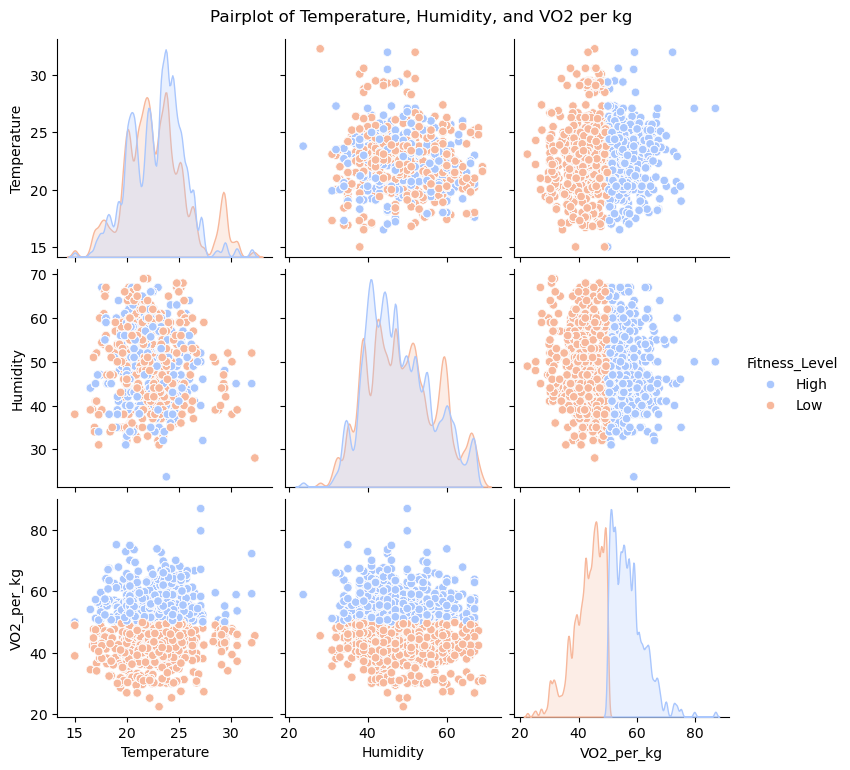

In [33]:
# Merge the datasets on 'ID_test'
merged_df = pd.merge(subject_info_df, test_measure_df, on='ID_test', how='inner')

# Calculate the maximum VO2 per ID_test
vo2_calc = merged_df.groupby('ID_test').agg({'VO2': 'max'}).reset_index()

# Merge the VO2 calculations back with the merged_df
vo2_athlete = pd.merge(merged_df, vo2_calc, on='ID_test', how='inner', suffixes=('', '_max'))

# Calculate VO2_per_kg using maximum VO2
vo2_athlete['VO2_per_kg'] = vo2_athlete['VO2_max'] / vo2_athlete['Weight']

# Step 1: Create Fitness Level based on VO2_per_kg
vo2_athlete['Fitness_Level'] = np.where(vo2_athlete['VO2_per_kg'] < vo2_athlete['VO2_per_kg'].median(), 'Low', 'High')

# Step 2: Visualizations
sns.pairplot(vo2_athlete, vars=['Temperature', 'Humidity', 'VO2_per_kg'], hue='Fitness_Level', palette='coolwarm')
plt.suptitle('Pairplot of Temperature, Humidity, and VO2 per kg', y=1.02)
plt.show()


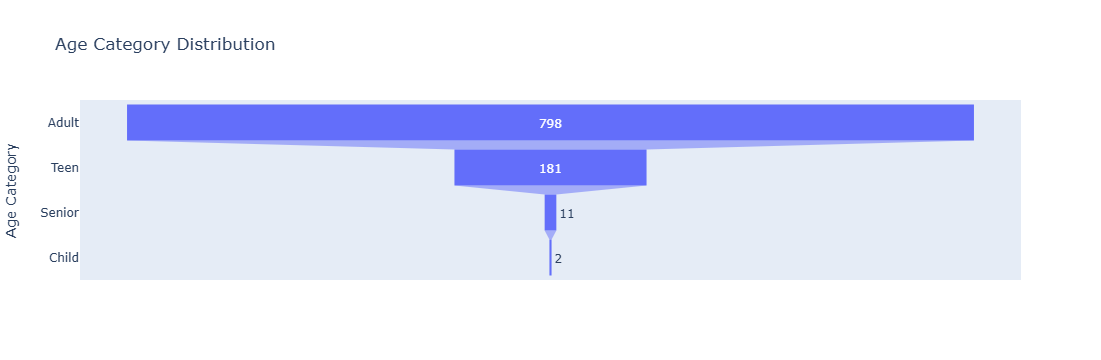

In [53]:
# Categorize Age
subject_info_df['Age_Category'] = pd.cut(subject_info_df['Age'], 
                                         bins=[0, 12, 19, 55, np.inf], 
                                         labels=['Child', 'Teen', 'Adult', 'Senior'], 
                                         right=False)

# Count the number of participants in each age category
age_counts = subject_info_df['Age_Category'].value_counts().reindex(['Child', 'Teen', 'Adult', 'Senior'], fill_value=0).sort_values(ascending=False)

# Create a funnel chart using plotly
fig = go.Figure(go.Funnel(
    y=age_counts.index,
    x=age_counts.values
))

fig.update_layout(
    title='Age Category Distribution',
    yaxis_title='Age Category',
    xaxis_title='Count'
)

fig.show()


How many participants took the test, and how many tests did each participant take?

In [ ]:
How many participants took the test, and  visualize the number of tests each participant?

In [59]:
# Load the dataset
subject_info_df = pd.read_csv('subject-info.csv')

# Count the number of unique participants
num_participants = subject_info_df['ID'].nunique()

# Count the number of tests each participant took
tests_per_participant = subject_info_df['ID'].value_counts()

print(f"Number of participants: {num_participants}")
print("Number of tests each participant took:")
print(tests_per_participant)


Number of participants: 857
Number of tests each participant took:
ID
506    5
492    4
511    3
552    3
553    3
      ..
725    1
265    1
695    1
165    1
296    1
Name: count, Length: 857, dtype: int64


How many participants took the test, and visualize the number of tests against each participant?

Number of participants: 857


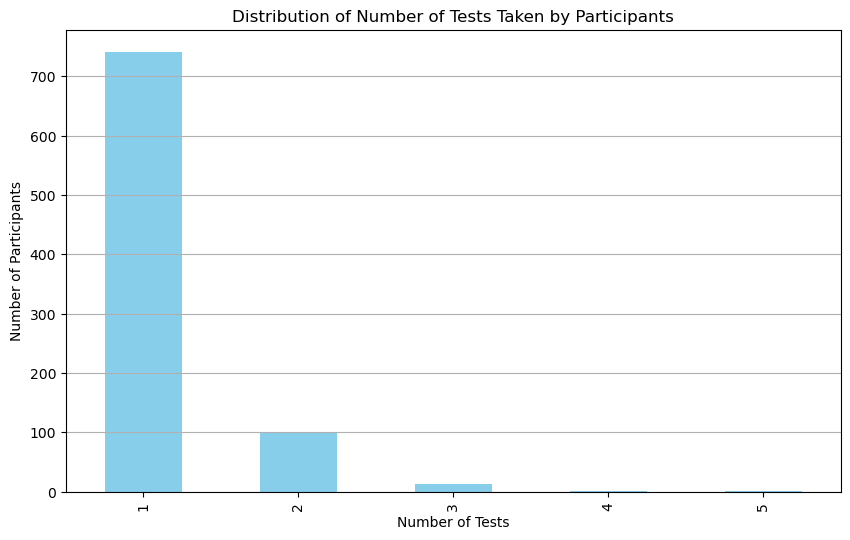

In [69]:
# Count the number of unique participants
num_participants = subject_info_df['ID'].nunique()

# Count the number of tests each participant took
tests_per_participant = subject_info_df['ID'].value_counts()

# Group by the number of tests
grouped_tests = tests_per_participant.value_counts().sort_index()

# Plot the bar graph
print(f"Number of participants: {num_participants}")
plt.figure(figsize=(10, 6))
grouped_tests.plot(kind='bar', color='skyblue')
plt.title('Distribution of Number of Tests Taken by Participants')
plt.xlabel('Number of Tests')
plt.ylabel('Number of Participants')
plt.grid(axis='y')
plt.show()


In [72]:
test_measure_df.columns

Index(['time', 'Speed', 'HR', 'VO2', 'VCO2', 'RR', 'VE', 'ID_test', 'ID'], dtype='object')

In [74]:
test_measure_df.head()

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
0,0,5.0,63.0,478.0,360.0,27,13.3,2_1,2
1,2,5.0,75.0,401.0,295.0,23,10.3,2_1,2
2,4,5.0,82.0,449.0,319.0,29,12.2,2_1,2
3,7,5.0,87.0,461.0,340.0,28,12.8,2_1,2
4,9,5.0,92.0,574.0,417.0,28,14.6,2_1,2


<Axes: xlabel='time', ylabel='Count'>

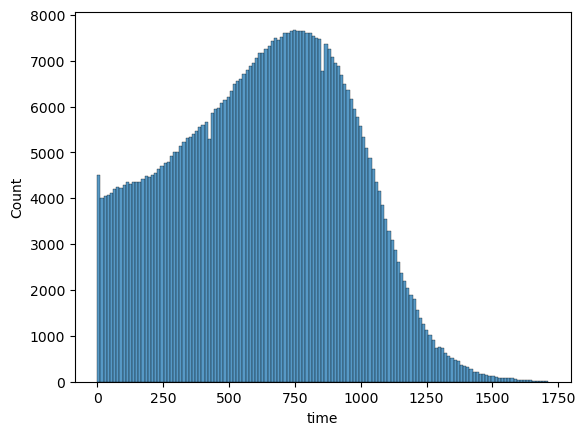

In [76]:
sns.histplot(data=test_measure_df, x='time')

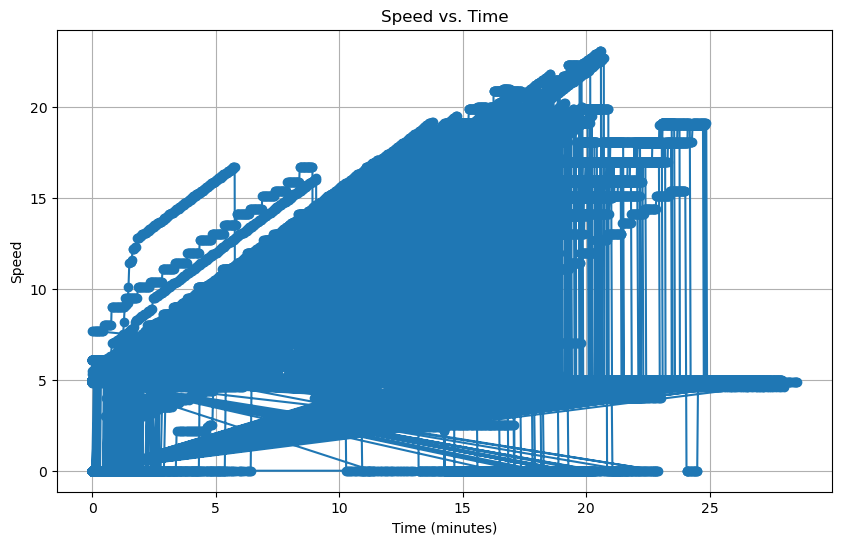

In [78]:
# Convert time from seconds to minutes
test_measure_df['time_minutes'] = test_measure_df['time'] / 60

# Plot speed against time
plt.figure(figsize=(10, 6))
plt.plot(test_measure_df['time_minutes'], test_measure_df['Speed'], marker='o')
plt.title('Speed vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Speed')
plt.grid(True)
plt.show()

C:\Users\akals\AppData\Local\Temp\ipykernel_6732\3984340783.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



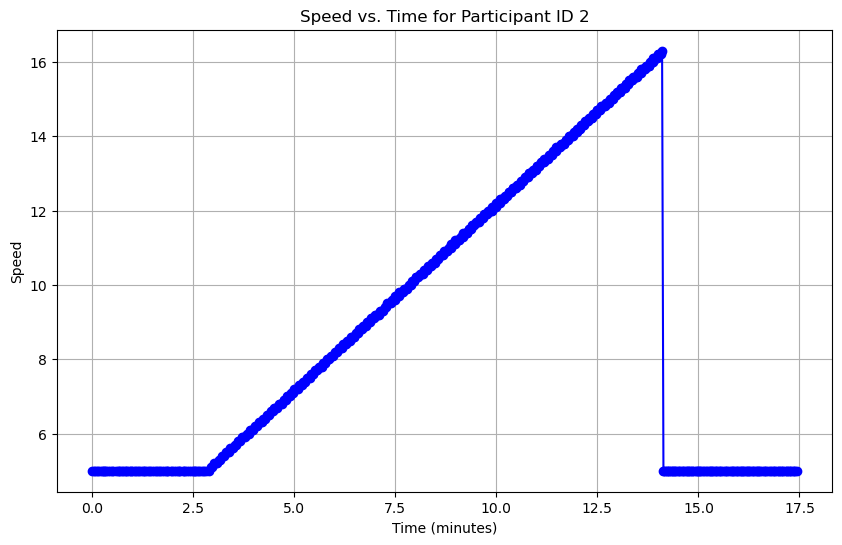

In [80]:
# Filter data for the specific participant ID
participant_id = 2
participant_data = test_measure_df[test_measure_df['ID'] == participant_id]

# Convert time from seconds to minutes
participant_data['time_minutes'] = participant_data['time'] / 60

# Plot speed against time for the specific participant
plt.figure(figsize=(10, 6))
plt.plot(participant_data['time_minutes'], participant_data['Speed'], marker='o', color='blue')
plt.title(f'Speed vs. Time for Participant ID {participant_id}')
plt.xlabel('Time (minutes)')
plt.ylabel('Speed')
plt.grid(True)
plt.show()

C:\Users\akals\AppData\Local\Temp\ipykernel_6732\746841934.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



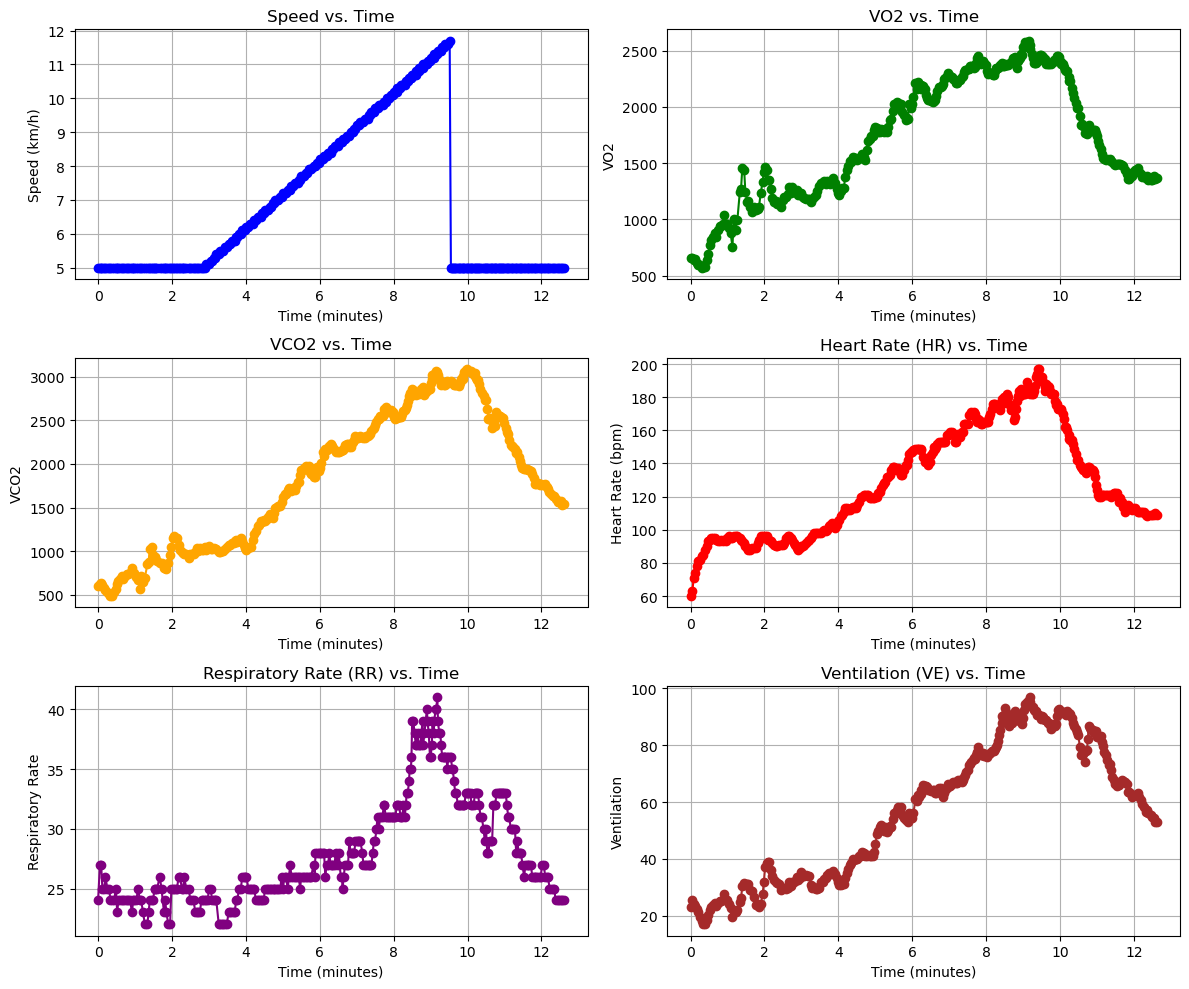

In [88]:
# Filter data for the specific participant ID
participant_id = 296
participant_data = test_measure_df[test_measure_df['ID'] == participant_id]

# Convert time from seconds to minutes
participant_data['time_minutes'] = participant_data['time'] / 60

# Plot multiple parameters against time for the specific participant
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(participant_data['time_minutes'], participant_data['Speed'], marker='o', color='blue')
plt.title('Speed vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Speed (km/h)')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(participant_data['time_minutes'], participant_data['VO2'], marker='o', color='green')
plt.title('VO2 vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('VO2')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(participant_data['time_minutes'], participant_data['VCO2'], marker='o', color='orange')
plt.title('VCO2 vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('VCO2')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(participant_data['time_minutes'], participant_data['HR'], marker='o', color='red')
plt.title('Heart Rate (HR) vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(participant_data['time_minutes'], participant_data['RR'], marker='o', color='purple')
plt.title('Respiratory Rate (RR) vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Respiratory Rate')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(participant_data['time_minutes'], participant_data['VE'], marker='o', color='brown')
plt.title('Ventilation (VE) vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Ventilation')
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\akals\AppData\Local\Temp\ipykernel_6732\1759253841.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



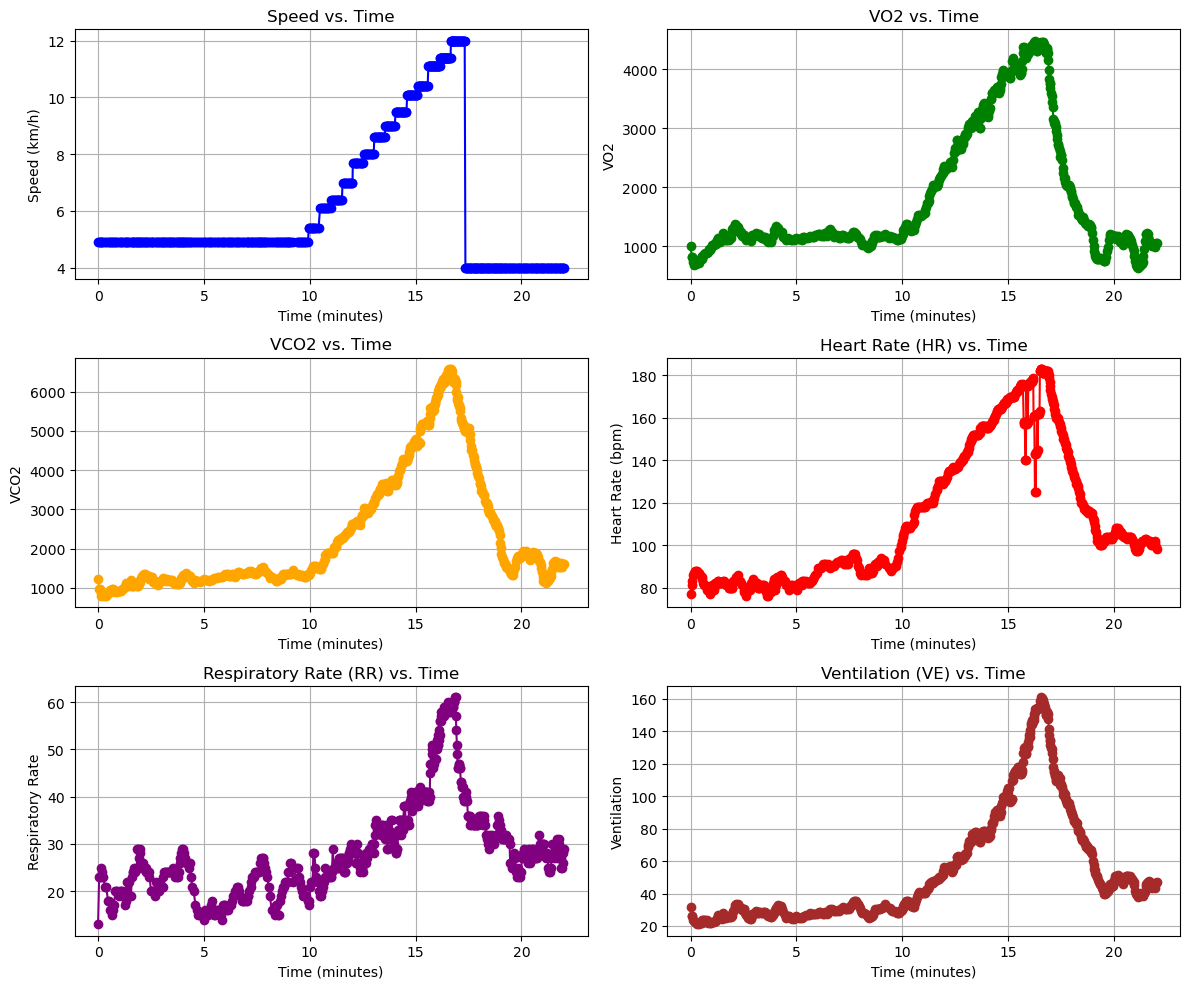

In [90]:
# Filter data for the specific participant ID
participant_id = 725
participant_data = test_measure_df[test_measure_df['ID'] == participant_id]

# Convert time from seconds to minutes
participant_data['time_minutes'] = participant_data['time'] / 60

# Plot multiple parameters against time for the specific participant
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(participant_data['time_minutes'], participant_data['Speed'], marker='o', color='blue')
plt.title('Speed vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Speed (km/h)')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(participant_data['time_minutes'], participant_data['VO2'], marker='o', color='green')
plt.title('VO2 vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('VO2')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(participant_data['time_minutes'], participant_data['VCO2'], marker='o', color='orange')
plt.title('VCO2 vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('VCO2')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(participant_data['time_minutes'], participant_data['HR'], marker='o', color='red')
plt.title('Heart Rate (HR) vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(participant_data['time_minutes'], participant_data['RR'], marker='o', color='purple')
plt.title('Respiratory Rate (RR) vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Respiratory Rate')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(participant_data['time_minutes'], participant_data['VE'], marker='o', color='brown')
plt.title('Ventilation (VE) vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Ventilation')
plt.grid(True)

plt.tight_layout()
plt.show()


In [94]:
warmup_phase

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID,time_minutes


In [98]:
# Filter data for the specific participant ID
participant_id = 725
participant_data = test_measure_df[test_measure_df['ID'] == participant_id]

# Convert time from seconds to minutes
participant_data['time_minutes'] = participant_data['time'] / 60

# Identify phases
warmup_phase = participant_data[participant_data['Speed'] == 5.0].head(1)
cooldown_phase = participant_data[participant_data['Speed'] == 5.0].tail(1)
incremental_phase = participant_data[(participant_data['time'] > warmup_phase['time'].values[0]) & (participant_data['time'] < cooldown_phase['time'].values[0])]

# Plot multiple parameters against time for the specific participant
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(participant_data['time_minutes'], participant_data['Speed'], marker='o', color='blue')
plt.title('Speed vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Speed (km/h)')
plt.axvspan(warmup_phase['time_minutes'].values[0], warmup_phase['time_minutes'].values[0], color='red', alpha=0.3, label='Warmup')
plt.axvspan(incremental_phase['time_minutes'].min(), incremental_phase['time_minutes'].max(), color='green', alpha=0.3, label='Incremental Effort')
plt.axvspan(cooldown_phase['time_minutes'].values[0], cooldown_phase['time_minutes'].values[0], color='blue', alpha=0.3, label='Cooldown')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(participant_data['time_minutes'], participant_data['VO2'], marker='o', color='green')
plt.title('VO2 vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('VO2')
plt.axvspan(warmup_phase['time_minutes'].values[0], warmup_phase['time_minutes'].values[0], color='red', alpha=0.3)
plt.axvspan(incremental_phase['time_minutes'].min(), incremental_phase['time_minutes'].max(), color='green', alpha=0.3)
plt.axvspan(cooldown_phase['time_minutes'].values[0], cooldown_phase['time_minutes'].values[0], color='blue', alpha=0.3)
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(participant_data['time_minutes'], participant_data['VCO2'], marker='o', color='orange')
plt.title('VCO2 vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('VCO2')
plt.axvspan(warmup_phase['time_minutes'].values[0], warmup_phase['time_minutes'].values[0], color='red', alpha=0.3)
plt.axvspan(incremental_phase['time_minutes'].min(), incremental_phase['time_minutes'].max(), color='green', alpha=0.3)
plt.axvspan(cooldown_phase['time_minutes'].values[0], cooldown_phase['time_minutes'].values[0], color='blue', alpha=0.3)
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(participant_data['time_minutes'], participant_data['HR'], marker='o', color='red')
plt.title('Heart Rate (HR) vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Heart Rate (bpm)')
plt.axvspan(warmup_phase['time_minutes'].values[0], warmup_phase['time_minutes'].values[0], color='red', alpha=0.3)
plt.axvspan(incremental_phase['time_minutes'].min(), incremental_phase['time_minutes'].max(), color='green', alpha=0.3)
plt.axvspan(cooldown_phase['time_minutes'].values[0], cooldown_phase['time_minutes'].values[0], color='blue', alpha=0.3)
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(participant_data['time_minutes'], participant_data['RR'], marker='o', color='purple')
plt.title('Respiratory Rate (RR) vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Respiratory Rate')
plt.axvspan(warmup_phase['time_minutes'].values[0], warmup_phase['time_minutes'].values[0], color='red', alpha=0.3)
plt.axvspan(incremental_phase['time_minutes'].min(), incremental_phase['time_minutes'].max(), color='green', alpha=0.3)
plt.axvspan(cooldown_phase['time_minutes'].values[0], cooldown_phase['time_minutes'].values[0], color='blue', alpha=0.3)
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(participant_data['time_minutes'], participant_data['VE'], marker='o', color='brown')
plt.title('Ventilation (VE) vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Ventilation')
plt.axvspan(warmup_phase['time_minutes'].values[0], warmup_phase['time_minutes'].values[0], color='red', alpha=0.3)
plt.axvspan(incremental_phase['time_minutes'].min(), incremental_phase['time_minutes'].max(), color='green', alpha=0.3)
plt.axvspan(cooldown_phase['time_minutes'].values[0], cooldown_phase['time_minutes'].values[0], color='blue', alpha=0.3)
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()


C:\Users\akals\AppData\Local\Temp\ipykernel_6732\2363115844.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



IndexError: index 0 is out of bounds for axis 0 with size 0

In [2]:
# Load the datasets
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Join the dataframes on ID and ID_test
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'])


NameError: name 'pd' is not defined

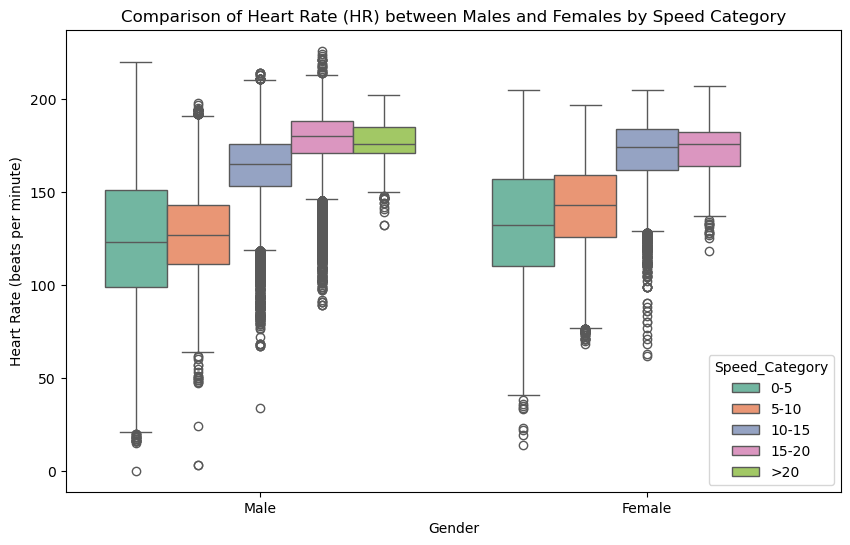

In [8]:
# Create a new column to indicate gender
joined_df['Gender'] = joined_df['Sex'].apply(lambda x: 'Male' if x == 0 else 'Female')

# Bin the Speed variable into categories
speed_bins = [0, 5, 10, 15, 20, float('inf')]
speed_labels = ['0-5', '5-10', '10-15', '15-20', '>20']
joined_df['Speed_Category'] = pd.cut(joined_df['Speed'], bins=speed_bins, labels=speed_labels)

# Create the boxplot with 'Speed_Category' as the hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='HR', hue='Speed_Category', data=joined_df, palette='Set2')
plt.title('Comparison of Heart Rate (HR) between Males and Females by Speed Category')
plt.xlabel('Gender')
plt.ylabel('Heart Rate (beats per minute)')
plt.show()


In [10]:
# Calculate HRR
joined_df['HR_max'] = 220 - joined_df['Age']
joined_df['HR_rest'] = joined_df.groupby('ID_test')['HR'].transform('min')
joined_df['HRR'] = joined_df['HR_max'] - joined_df['HR_rest']

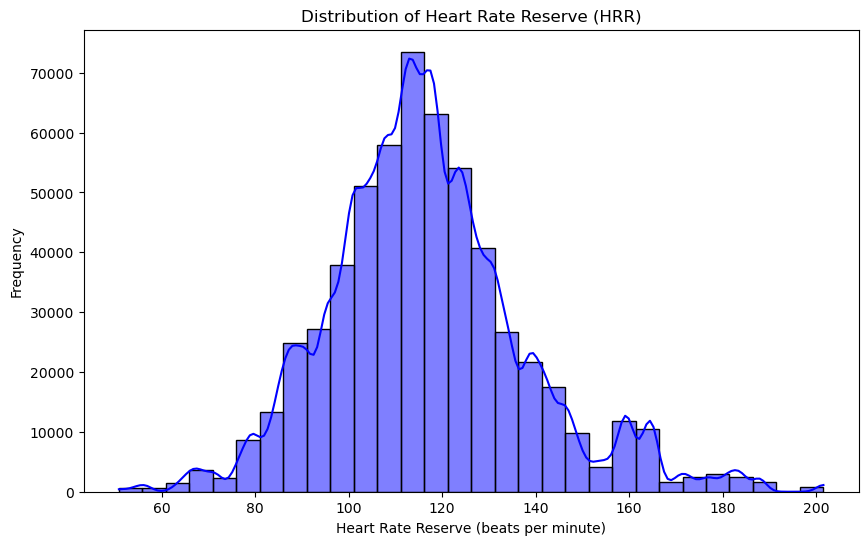

In [12]:
# Calculate HRR
joined_df['HR_max'] = 220 - joined_df['Age']
joined_df['HR_rest'] = joined_df.groupby('ID_test')['HR'].transform('min')
joined_df['HRR'] = joined_df['HR_max'] - joined_df['HR_rest']

# Create a histogram to visualize the distribution of HRR
plt.figure(figsize=(10, 6))
sns.histplot(joined_df['HRR'], bins=30, kde=True, color='blue')
plt.title('Distribution of Heart Rate Reserve (HRR)')
plt.xlabel('Heart Rate Reserve (beats per minute)')
plt.ylabel('Frequency')
plt.show()


C:\Users\akals\AppData\Local\Temp\ipykernel_13340\1579972925.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(joined_df['HRR'], shade=True, color='blue')


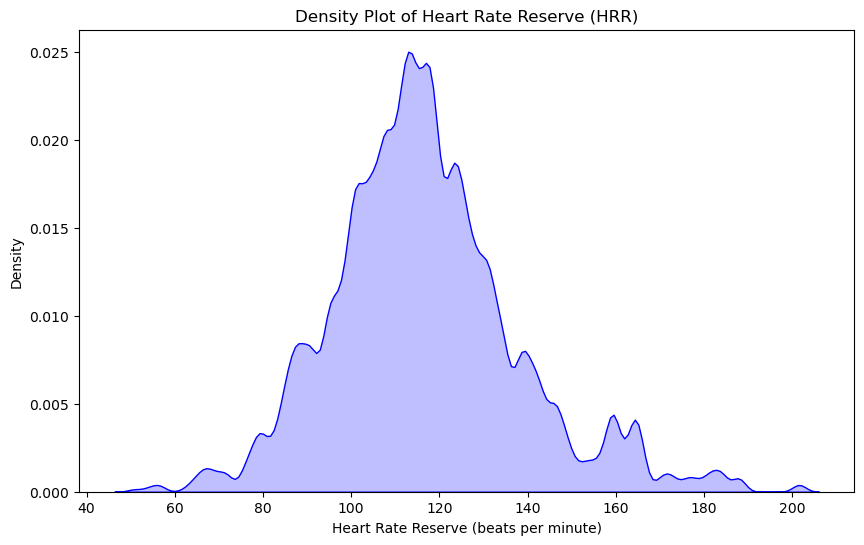

In [18]:
# Calculate HRR
joined_df['HR_max'] = 220 - joined_df['Age']
joined_df['HR_rest'] = joined_df.groupby('ID_test')['HR'].transform('min')
joined_df['HRR'] = joined_df['HR_max'] - joined_df['HR_rest']

# Create a density plot to visualize the distribution of HRR
plt.figure(figsize=(10, 6))
sns.kdeplot(joined_df['HRR'], shade=True, color='blue')
plt.title('Density Plot of Heart Rate Reserve (HRR)')
plt.xlabel('Heart Rate Reserve (beats per minute)')
plt.ylabel('Density')
plt.show()


In [26]:
df.head()

,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID,Age,Weight,Height,Humidity,Temperature,Sex
time,,,,,,,,,,,,,,
1970-01-01 00:00:00,5.0,63.0,478.0,360.0,27,13.3,2_1,2,33.8,68.0,171.1,NaN,NaN,0
1970-01-01 00:00:02,5.0,75.0,401.0,295.0,23,10.3,2_1,2,33.8,68.0,171.1,NaN,NaN,0
1970-01-01 00:00:04,5.0,82.0,449.0,319.0,29,12.2,2_1,2,33.8,68.0,171.1,NaN,NaN,0
1970-01-01 00:00:07,5.0,87.0,461.0,340.0,28,12.8,2_1,2,33.8,68.0,171.1,NaN,NaN,0
1970-01-01 00:00:09,5.0,92.0,574.0,417.0,28,14.6,2_1,2,33.8,68.0,171.1,NaN,NaN,0


In [28]:
import pandas as pd

# Assuming you've already loaded your data into a DataFrame called df
# Calculate RER
df['RER'] = df['VCO2'] / df['VO2']

# Initialize phase and previous speed
df['Phase'] = 'Warmup'
previous_speed = df['Speed'].iloc[0]

# Define phase transition logic
for i in range(1, len(df)):
    current_speed = df['Speed'].iloc[i]
    if current_speed > previous_speed and (df['Phase'].iloc[i-1] == 'Warmup' or df['Phase'].iloc[i-1] == 'Moderate'):
        df.at[i, 'Phase'] = 'Moderate'
    elif current_speed > previous_speed and df['Phase'].iloc[i-1] == 'Moderate':
        df.at[i, 'Phase'] = 'Peak'
    elif current_speed < previous_speed:
        df.at[i, 'Phase'] = 'Recovery'
    else:
        df.at[i, 'Phase'] = df['Phase'].iloc[i-1]
    previous_speed = current_speed

# Display the first few rows of the updated DataFrame
print(df.head())

# Save to a new CSV file if needed
#df.to_csv('categorized_exercise_phases.csv', index=False)


KeyboardInterrupt: 

In [30]:
# Initialize phase and previous speed
df['Phase'] = 'Warmup'
previous_speed = df['Speed'].iloc[0]

# Define phase transition logic
for i in range(1, len(df)):
    current_speed = df['Speed'].iloc[i]
    if current_speed > previous_speed and (df['Phase'].iloc[i-1] == 'Warmup' or df['Phase'].iloc[i-1] == 'Moderate'):
        df.at[i, 'Phase'] = 'Moderate'
    elif current_speed > previous_speed and df['Phase'].iloc[i-1] == 'Moderate':
        df.at[i, 'Phase'] = 'Peak'
    elif current_speed < previous_speed:
        df.at[i, 'Phase'] = 'Recovery'
    else:
        df.at[i, 'Phase'] = df['Phase'].iloc[i-1]
    previous_speed = current_speed

# Display the first few rows of the updated DataFrame
print(df.head())

# Save to a new CSV file if needed
#df.to_csv('categorized_exercise_phases.csv', index=False)


KeyboardInterrupt: 

In [32]:
# Initialize phase and previous speed
df['Phase'] = 'Warmup'
previous_speed = 5  # Starting at 5 km/h for the warm-up phase

# Define the phases and speed transitions
for i in range(1, len(df)):
    current_speed = df['Speed'].iloc[i]
    
    # Warm-up: Gradually increase speed from 5 km/h to higher speed
    if current_speed < 7 and df['Phase'].iloc[i-1] == 'Warmup':
        df.at[i, 'Phase'] = 'Warmup'
    
    # Main Workout: Gradually increase speed
    elif current_speed >= 7 and df['Phase'].iloc[i-1] == 'Warmup':
        df.at[i, 'Phase'] = 'Moderate'
    
    # Peak Phase (Moderate to High intensity)
    elif current_speed >= 10 and df['Phase'].iloc[i-1] == 'Moderate':
        df.at[i, 'Phase'] = 'Peak'
    
    # Cool-down: Sudden decrease in speed
    elif current_speed < previous_speed and df['Phase'].iloc[i-1] == 'Peak':
        df.at[i, 'Phase'] = 'Recovery'
    
    # Update previous speed for the next iteration
    previous_speed = current_speed

# Display the first few rows of the updated DataFrame
print(df.head())


KeyboardInterrupt: 

In [10]:
# Load the datasets
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Join the dataframes on ID and ID_test
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'])


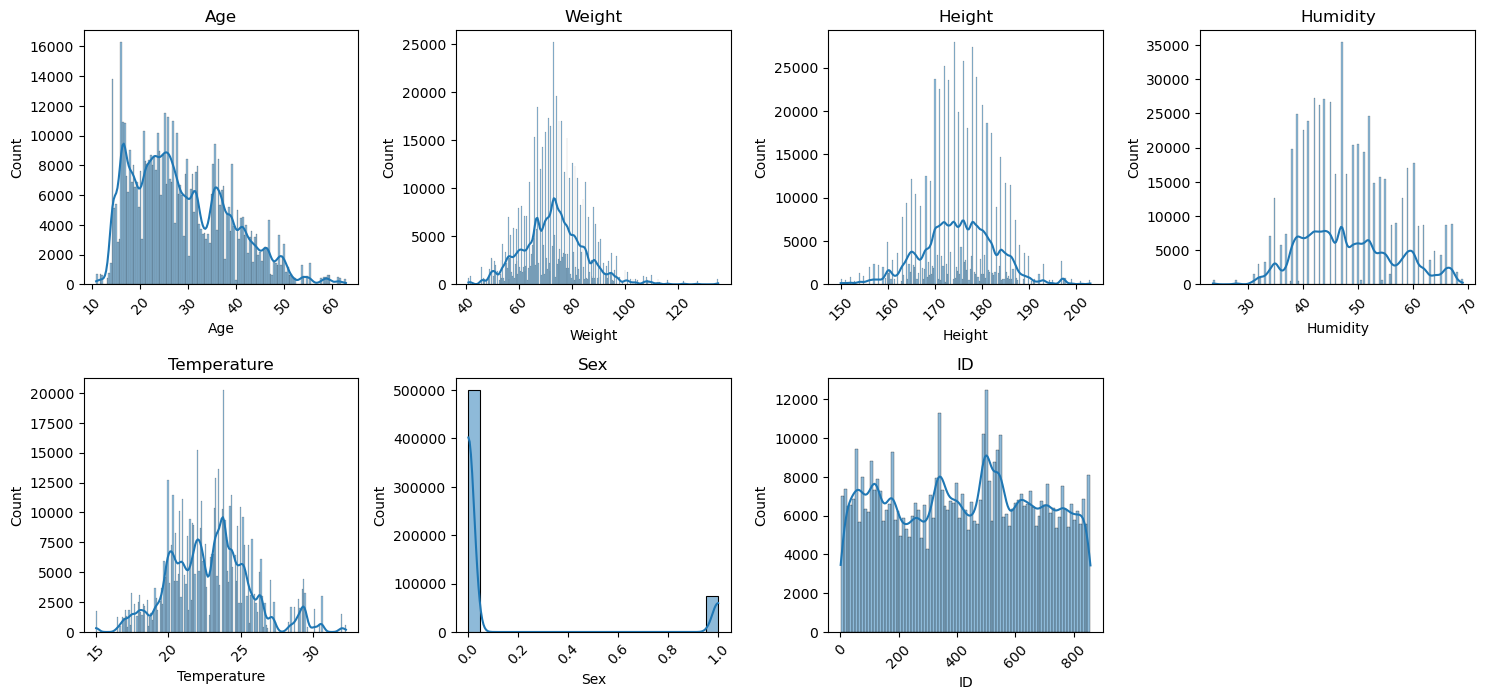

In [14]:
# Create a figure for numerical features distribution
numerical_cols = subject_info.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

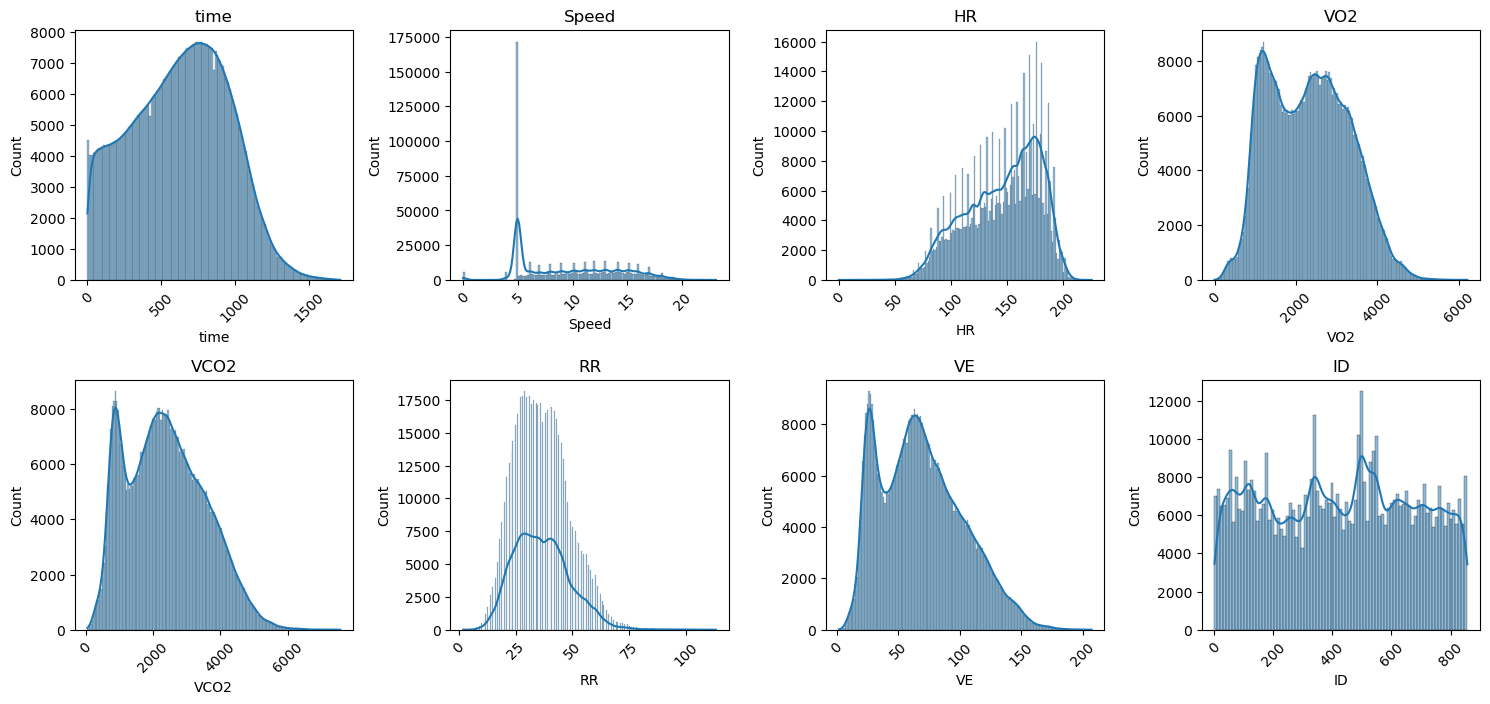

In [16]:
# Create a figure for numerical features distribution
numerical_cols = test_measure.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd

# Sample data: list of speeds and their corresponding time values
data = {
    'speed': [4, 5, 6, 7, 8, 7, 6, 5, 4],
    'time': [0, 1, 2, 3, 4, 5, 6, 7, 8]
}

# Create DataFrame
df = pd.DataFrame(data)

# Initialize variables
warm_up_time = 0
get_time = 0
cool_down_time = 0
max_speed = df['speed'].max()
reached_max_speed = False

# Iterate through DataFrame
for i in range(len(df)):
    if df.loc[i, 'speed'] <= 5:
        warm_up_time += df.loc[i, 'time'] - (df.loc[i-1, 'time'] if i > 0 else 0)
    elif df.loc[i, 'speed'] > 5:
        if df.loc[i, 'speed'] == max_speed:
            reached_max_speed = True
        get_time += df.loc[i, 'time'] - (df.loc[i-1, 'time'] if i > 0 else 0)
    if reached_max_speed and df.loc[i, 'speed'] < max_speed:
        cool_down_time += df.loc[i, 'time'] - (df.loc[i-1, 'time'] if i > 0 else 0)

print(f"Warm up time: {warm_up_time} seconds")
print(f"GET time: {get_time} seconds")
print(f"Cool down time: {cool_down_time} seconds")


Warm up time: 3 seconds
GET time: 5 seconds
Cool down time: 4 seconds


In [176]:
test_measure = pd.read_csv('test_measure.csv')

In [178]:
df=test_measure.copy()

In [112]:
df.columns 

Index(['time', 'Speed', 'HR', 'VO2', 'VCO2', 'RR', 'VE', 'ID_test', 'ID'], dtype='object')

In [180]:
# Function to calculate warm-up, GET, and cool-down times for each test
def calculate_times(group):
    warm_up_time = 0
    get_time = 0
    cool_down_time = 0
    max_speed = group['Speed'].max()
    reached_max_speed = False

    for i in range(len(group)):
        if group.iloc[i]['Speed'] <= 5:
            warm_up_time += group.iloc[i]['time'] - (group.iloc[i-1]['time'] if i > 0 else 0)
        elif group.iloc[i]['Speed'] > 5:
            if group.iloc[i]['Speed'] == max_speed:
                reached_max_speed = True
            get_time += group.iloc[i]['time'] - (group.iloc[i-1]['time'] if i > 0 else 0)
        if reached_max_speed and group.iloc[i]['Speed'] < max_speed:
            cool_down_time += group.iloc[i]['time'] - (group.iloc[i-1]['time'] if i > 0 else 0)

    return pd.Series({
        'Warm up time': warm_up_time,
        'GET time': get_time,
        'Cool down time': cool_down_time
    })

# Group by ID_test and apply the function
result = df.groupby('ID_test').apply(calculate_times).reset_index()

print(result)


     ID_test  Warm up time  GET time  Cool down time
0      100_1           352       674             180
1      101_1           362       662             195
2      102_1           353       517             188
3      103_1           225       636             187
4      104_1           314       830             180
5      105_1           355       646             186
6      106_1           364       823             196
7      107_1           359       597             192
8      108_1           421       842             190
9      108_4           356       642             183
10     109_1           341       631             164
11    109_12           370       718             199
12      10_1           303       783             193
13     110_1           367       821             191
14    110_12           354       855             166
15     111_1           379       840             207
16    111_15           469       778             183
17     112_1           372       865          

In [116]:
result.describe() 

,Warm up time,GET time,Cool down time
count,992.000000,992.000000,992.000000
mean,409.383065,682.643145,199.526210
std,142.149438,154.825541,46.095996
min,59.000000,208.000000,64.000000
25%,352.000000,594.750000,182.000000
50%,365.000000,704.000000,188.000000
75%,461.250000,796.000000,200.000000
max,1057.000000,1082.000000,762.000000


In [118]:
# Convert times from seconds to minutes
result['Warm up time (min)'] = result['Warm up time'] / 60
result['GET time (min)'] = result['GET time'] / 60
result['Cool down time (min)'] = result['Cool down time'] / 60

# Drop the original columns in seconds
result.drop(columns=['Warm up time', 'GET time', 'Cool down time'], inplace=True)

print(result)


    ID_test  Warm up time (min)  GET time (min)  Cool down time (min)
0     100_1            5.866667       11.233333              3.000000
1     101_1            6.033333       11.033333              3.250000
2     102_1            5.883333        8.616667              3.133333
3     103_1            3.750000       10.600000              3.116667
4     104_1            5.233333       13.833333              3.000000
..      ...                 ...             ...                   ...
987    98_1            6.750000       13.333333              3.766667
988    99_1            6.166667        9.283333              3.100000
989   99_47            5.916667        6.883333              3.066667
990   99_54            3.783333       11.200000              3.016667
991     9_1            6.966667        7.950000              3.600000

[992 rows x 4 columns]


In [120]:
result.describe()

,Warm up time (min),GET time (min),Cool down time (min)
count,992.000000,992.000000,992.000000
mean,6.823051,11.377386,3.325437
std,2.369157,2.580426,0.768267
min,0.983333,3.466667,1.066667
25%,5.866667,9.912500,3.033333
50%,6.083333,11.733333,3.133333
75%,7.687500,13.266667,3.333333
max,17.616667,18.033333,12.700000


In [182]:
# Check if total time is correctly distributed
df_check = df.groupby('ID_test').agg(
    total_time=('time', lambda x: x.max() - x.min())  # Total test duration
).merge(result, on='ID_test')

# Verify if the sum of calculated times matches total test duration
df_check['error'] = df_check['total_time'] - (df_check['Warm up time'] + df_check['GET time'] + df_check['Cool down time'])

# Print rows where there is a mismatch
print(df_check[df_check['error'] != 0])

     ID_test  total_time  Warm up time  GET time  Cool down time  error
0      100_1        1026           352       674             180   -180
1      101_1        1024           362       662             195   -195
2      102_1         870           353       517             188   -188
3      103_1         861           225       636             187   -187
4      104_1        1144           314       830             180   -180
5      105_1        1001           355       646             186   -186
6      106_1        1187           364       823             196   -196
7      107_1         956           359       597             192   -192
8      108_1        1263           421       842             190   -190
9      108_4         998           356       642             183   -183
10     109_1         972           341       631             164   -164
11    109_12        1088           370       718             199   -199
12      10_1        1086           303       783             193

In [122]:
subject_info = pd.read_csv('subject-info.csv')

In [124]:
merged_df = pd.merge(subject_info, result, on='ID_test')

In [126]:
subject_info.shape

(992, 8)

In [128]:
merged_df.head()

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test,Warm up time (min),GET time (min),Cool down time (min)
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1,5.850000,10.166667,2.983333
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1,4.950000,9.116667,3.116667
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1,5.383333,8.150000,2.566667
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1,6.150000,10.400000,3.116667
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1,6.116667,14.416667,2.983333


In [130]:
# Find maximum times
max_warm_up_time = merged_df['Warm up time (min)'].max()
max_get_time = merged_df['GET time (min)'].max()
max_cool_down_time = merged_df['Cool down time (min)'].max()

print(f"Maximum Warm up time: {max_warm_up_time} minutes")
print(f"Maximum GET time: {max_get_time} minutes")
print(f"Maximum Cool down time: {max_cool_down_time} minutes")

Maximum Warm up time: 17.616666666666667 minutes
Maximum GET time: 18.033333333333335 minutes
Maximum Cool down time: 12.7 minutes


In [132]:
# Find the rows with maximum times
max_warm_up_time_row = merged_df[merged_df['Warm up time (min)'] == merged_df['Warm up time (min)'].max()]
max_get_time_row =merged_df[merged_df['GET time (min)'] == merged_df['GET time (min)'].max()]
max_cool_down_time_row = merged_df[merged_df['Cool down time (min)'] == merged_df['Cool down time (min)'].max()]

# Print the rows with maximum times
print("Row with Maximum Warm up time:")
print(max_warm_up_time_row)

print("\nRow with Maximum GET time:")
print(max_get_time_row)

print("\nRow with Maximum Cool down time:")
print(max_cool_down_time_row)


Row with Maximum Warm up time:
      Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test  \
429  25.5    80.4   178.0      54.0         23.7    0  735   735_1   

     Warm up time (min)  GET time (min)  Cool down time (min)  
429           17.616667       10.383333              5.816667  

Row with Maximum GET time:
      Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test  \
148  18.0    63.0   171.0      62.0         22.2    0  431   431_1   

     Warm up time (min)  GET time (min)  Cool down time (min)  
148            5.633333       18.033333              3.066667  

Row with Maximum Cool down time:
      Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test  \
922  45.6    76.0   176.0      53.0         26.3    0  218   218_1   

     Warm up time (min)  GET time (min)  Cool down time (min)  
922               15.65        7.916667                  12.7  


In [134]:
df.head()

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
0,0,5.0,63.0,478.0,360.0,27,13.3,2_1,2
1,2,5.0,75.0,401.0,295.0,23,10.3,2_1,2
2,4,5.0,82.0,449.0,319.0,29,12.2,2_1,2
3,7,5.0,87.0,461.0,340.0,28,12.8,2_1,2
4,9,5.0,92.0,574.0,417.0,28,14.6,2_1,2


In [138]:
result

,ID_test,Warm up time (min),GET time (min),Cool down time (min)
0,100_1,5.866667,11.233333,3.000000
1,101_1,6.033333,11.033333,3.250000
2,102_1,5.883333,8.616667,3.133333
3,103_1,3.750000,10.600000,3.116667
4,104_1,5.233333,13.833333,3.000000
...,...,...,...,...
987,98_1,6.750000,13.333333,3.766667
988,99_1,6.166667,9.283333,3.100000
989,99_47,5.916667,6.883333,3.066667
990,99_54,3.783333,11.200000,3.016667


In [158]:
df['time'].is_monotonic_increasing


False

In [162]:
pd.set_option('display.max_rows', None)

In [164]:
df.groupby('ID_test')['time'].apply(lambda x: x.is_monotonic_increasing)


ID_test
100_1      True
101_1      True
102_1      True
103_1      True
104_1      True
105_1      True
106_1      True
107_1      True
108_1      True
108_4      True
109_1      True
109_12     True
10_1       True
110_1      True
110_12     True
111_1      True
111_15     True
112_1      True
113_1      True
114_1      True
115_1      True
116_1      True
117_1      True
118_1      True
118_4      True
119_1      True
119_15     True
11_1       True
120_1      True
121_1      True
122_1      True
123_1      True
124_1      True
124_3      True
125_1      True
125_6      True
126_1      True
127_1      True
128_1      True
129_1      True
12_1       True
130_1      True
131_1      True
132_1      True
132_7      True
133_1      True
133_4      True
134_1      True
134_2      True
135_1      True
136_1      True
137_1      True
138_1      True
139_1      True
13_1       True
140_1      True
141_1      True
142_1      True
143_1      True
144_1      True
145_1      True
146_1      True


In [166]:
test_measure = pd.read_csv('test_measure.csv')

In [168]:
df=test_measure.copy()

In [170]:
# Function to calculate warm-up, GET, and cool-down times for each test
def calculate_times(group):
    warm_up_time = 0
    get_time = 0
    cool_down_time = 0
    max_speed = group['Speed'].max()
    reached_max_speed = False

    prev_time = group.iloc[0]['time']  # Initialize with the first timestamp

    for i in range(len(group)):
        current_time = group.iloc[i]['time']
        time_diff = current_time - prev_time if i > 0 else 0  # Avoid incorrect subtraction at i=0

        if group.iloc[i]['Speed'] <= 5:
            warm_up_time += time_diff
        elif group.iloc[i]['Speed'] > 5:
            if group.iloc[i]['Speed'] == max_speed:
                reached_max_speed = True
            get_time += time_diff
        if reached_max_speed and group.iloc[i]['Speed'] < max_speed:
            cool_down_time += time_diff

        prev_time = current_time  # Update prev_time for the next iteration

    return pd.Series({
        'Warm up time': warm_up_time,
        'GET time': get_time,
        'Cool down time': cool_down_time
    })

# Group by ID_test and apply the function
result = df.groupby('ID_test').apply(calculate_times).reset_index()

print(result)


     ID_test  Warm up time  GET time  Cool down time
0      100_1           352       674             180
1      101_1           362       662             195
2      102_1           353       517             188
3      103_1           225       636             187
4      104_1           314       830             180
5      105_1           355       646             186
6      106_1           364       823             196
7      107_1           359       597             192
8      108_1           421       842             190
9      108_4           356       642             183
10     109_1           341       631             164
11    109_12           370       718             199
12      10_1           303       783             193
13     110_1           367       821             191
14    110_12           354       855             166
15     111_1           379       840             207
16    111_15           469       778             183
17     112_1           372       865          

In [172]:
result.describe()

,Warm up time,GET time,Cool down time
count,992.000000,992.000000,992.000000
mean,409.383065,682.643145,199.526210
std,142.149438,154.825541,46.095996
min,59.000000,208.000000,64.000000
25%,352.000000,594.750000,182.000000
50%,365.000000,704.000000,188.000000
75%,461.250000,796.000000,200.000000
max,1057.000000,1082.000000,762.000000


In [174]:
# Check if total time is correctly distributed
df_check = df.groupby('ID_test').agg(
    total_time=('time', lambda x: x.max() - x.min())  # Total test duration
).merge(result, on='ID_test')

# Verify if the sum of calculated times matches total test duration
df_check['error'] = df_check['total_time'] - (df_check['Warm up time'] + df_check['GET time'] + df_check['Cool down time'])

# Print rows where there is a mismatch
print(df_check[df_check['error'] != 0])


     ID_test  total_time  Warm up time  GET time  Cool down time  error
0      100_1        1026           352       674             180   -180
1      101_1        1024           362       662             195   -195
2      102_1         870           353       517             188   -188
3      103_1         861           225       636             187   -187
4      104_1        1144           314       830             180   -180
5      105_1        1001           355       646             186   -186
6      106_1        1187           364       823             196   -196
7      107_1         956           359       597             192   -192
8      108_1        1263           421       842             190   -190
9      108_4         998           356       642             183   -183
10     109_1         972           341       631             164   -164
11    109_12        1088           370       718             199   -199
12      10_1        1086           303       783             193